## Libraries

In [2]:
import pandas as pd
import numpy as np
from crepes import ConformalClassifier, ConformalPredictiveSystem
from crepes.extras import hinge, margin, binning, DifficultyEstimator

## Data

### Calibration 

In [76]:
# data_dir = "calibration_and_test.xlsx" #directory
# df_cal=pd.read_excel(data_dir,sheet_name='conf_score_25') #cal dataset with conf=0.25
# df_cal_tp = df_cal[df_cal['TP']==1] # True Positive Predictions Only

In [1]:
# def process_df_for_gt_obj_id(df, gt_obj_id, conf_score_column):
#     # Filter rows where gt_obj_id matches
#     filtered_df = df[df['gt_obj_id'] == gt_obj_id]

#     # Sort by the specified confidence score in ascending order
#     sorted_df = filtered_df.sort_values(by=conf_score_column)

#     # Define quantities for each category
#     total_rows = 43
#     rows_greater_than_08 = int(0.1 * total_rows)  # 10% of 43
#     rows_between_05_and_08 = int(0.7 * total_rows)  # 70% of 43

#     # Extract rows for each category
#     extracted_greater_than_08 = sorted_df[sorted_df[conf_score_column] > 0.8].head(rows_greater_than_08)
#     extracted_between_05_and_08 = sorted_df[(sorted_df[conf_score_column] <= 0.8) & (sorted_df[conf_score_column] >= 0.5)].head(rows_between_05_and_08)
#     remaining_rows_needed = total_rows - (len(extracted_greater_than_08) + len(extracted_between_05_and_08))
#     extracted_less_than_05 = sorted_df[sorted_df[conf_score_column] < 0.5].head(remaining_rows_needed)

#     # Combine the extracted rows
#     final_extracted_rows = pd.concat([extracted_less_than_05, extracted_between_05_and_08, extracted_greater_than_08])

#     return final_extracted_rows

# # Process and display the final extracted rows for each gt_obj_id with the corresponding confidence score column
# final_extracted_rows_0 = process_df_for_gt_obj_id(df_cal_tp, 0, 'ascaris_conf_score')
# # print(final_extracted_rows_0)

# final_extracted_rows_1 = process_df_for_gt_obj_id(df_cal_tp, 1, 'trichuris_conf_score')
# # print(final_extracted_rows_1)

# final_extracted_rows_3 = process_df_for_gt_obj_id(df_cal_tp, 3, 'schistosoma_conf_score')
# # print(final_extracted_rows_3)

# # Filter the DataFrame for gt_obj_id equal to 2
# final_extracted_rows_2 = df_cal_tp[df_cal_tp['gt_obj_id'] == 2]

# # Display the shape to confirm it has 43 rows as mentioned
# # print(final_extracted_rows_2.shape)

# # Display the DataFrame
# # final_extracted_rows_2
# # Merge the four DataFrames into a single DataFrame
# merged_df = pd.concat([final_extracted_rows_0, final_extracted_rows_1, final_extracted_rows_2, final_extracted_rows_3])

# # Display the merged DataFrame


C:\Users\M\AppData\Local\Temp\ipykernel_37488\641660864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_tp[conf_score_column] = pd.cut(df_cal_tp[conf_score_column], bins=np.arange(0, 1.1, 0.1))


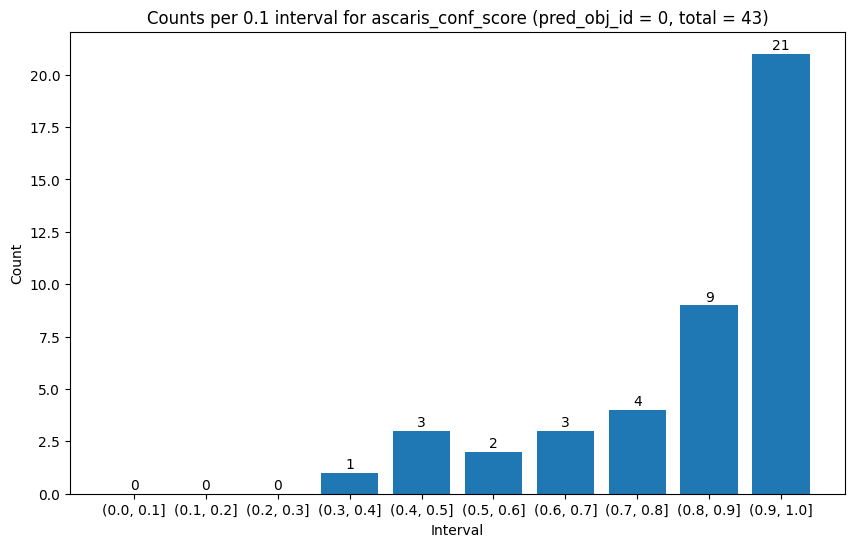

C:\Users\M\AppData\Local\Temp\ipykernel_37488\641660864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_tp[conf_score_column] = pd.cut(df_cal_tp[conf_score_column], bins=np.arange(0, 1.1, 0.1))


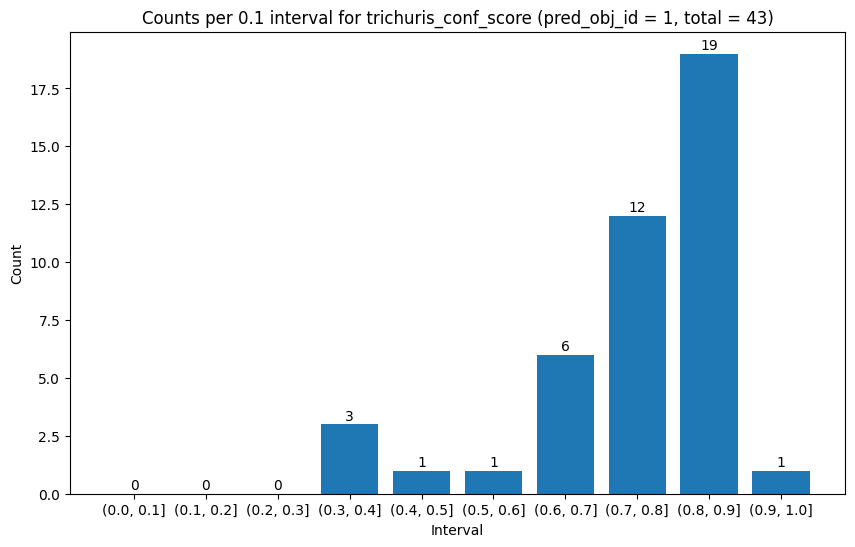

C:\Users\M\AppData\Local\Temp\ipykernel_37488\641660864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_tp[conf_score_column] = pd.cut(df_cal_tp[conf_score_column], bins=np.arange(0, 1.1, 0.1))


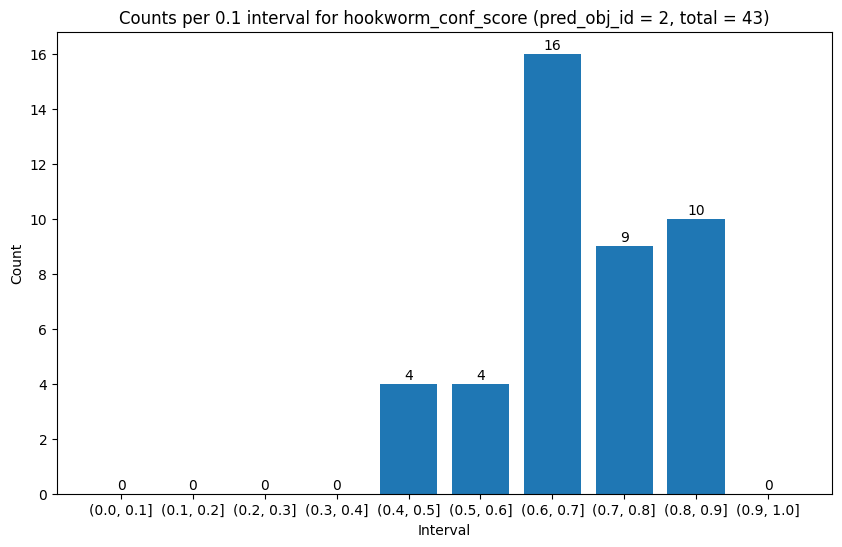

C:\Users\M\AppData\Local\Temp\ipykernel_37488\641660864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_tp[conf_score_column] = pd.cut(df_cal_tp[conf_score_column], bins=np.arange(0, 1.1, 0.1))


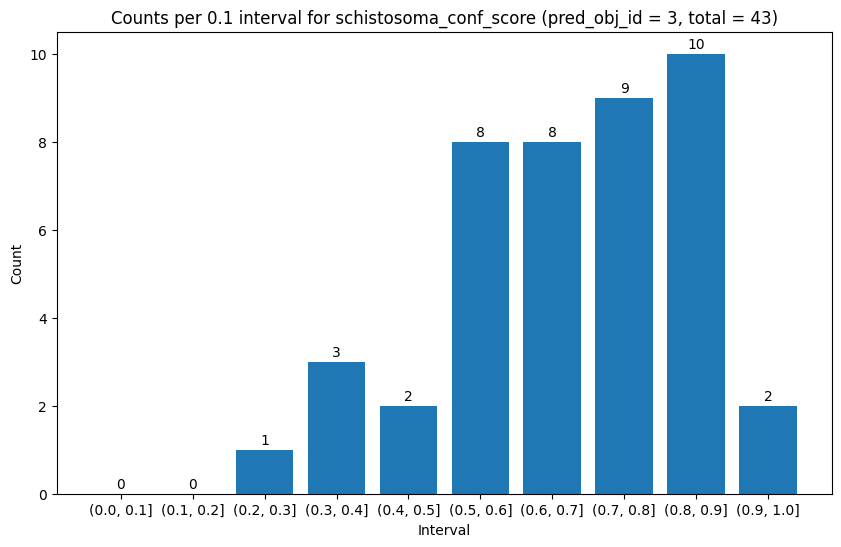

In [4]:
import matplotlib.pyplot as plt

# Define the mapping between 'pred_obj_id' and the corresponding confidence score column
mapping = {0: 'ascaris_conf_score', 1: 'trichuris_conf_score', 2: 'hookworm_conf_score', 3: 'schistosoma_conf_score'}

# Loop over the mapping
for pred_obj_id, conf_score_column in mapping.items():
    # Filter the DataFrame by 'pred_obj_id'
    df_cal_tp = df_sampled[df_sampled['pred_obj_id'] == pred_obj_id]
    
    # Categorize the data into 0.1 intervals
    df_cal_tp[conf_score_column] = pd.cut(df_cal_tp[conf_score_column], bins=np.arange(0, 1.1, 0.1))
    
    # Count the number of occurrences in each interval
    counts = df_cal_tp[conf_score_column].value_counts().sort_index()
    
    # Calculate the total count
    total_count = counts.sum()
    
    # Create a bar plot of the counts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel('Interval')
    plt.ylabel('Count')
    plt.title(f'Counts per 0.1 interval for {conf_score_column} (pred_obj_id = {pred_obj_id}, total = {total_count})')
    
    # Add the counts on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
    
    plt.show()

In [81]:
# df_test=pd.read_excel(data_dir,sheet_name='test_conf_score_25') #test dataset with conf=0.25
# df_test_filtered = df_test[df_test['pred_obj_id'] != '-']
# df_calibration=merged_df
# df_testing=df_test_filtered

In [3]:
data_dir = "calibration_and_test.xlsx" #directory
df_cal=pd.read_excel(data_dir,sheet_name='conf_score_25') #cal dataset with conf=0.25
df_cal_tp = df_cal[df_cal['TP']==1] # True Positive Predictions Only

# 43 samples from each class
sample_size = 43

# Set a seed for the random number generator
seed = 100

df_sampled = df_cal_tp.groupby('pred_obj_id').apply(lambda x: x.sample(sample_size, replace=True, random_state=seed))
df_sampled = df_sampled.reset_index(drop=True)

df_test=pd.read_excel(data_dir,sheet_name='test_conf_score_25') #test dataset with conf=0.25
df_test_filtered = df_test[df_test['pred_obj_id'] != '-']
df_calibration=df_sampled
df_testing=df_test_filtered

In [82]:
from my_functions import (softmax, 
                          softmax_df, 
                          calculate_logit, 
                          calculate_sigmoid, 
                          calculate_softmax,
                          calculate_hinge_scores,
                          calculate_p_values,
                          calculate_prediction_sets)

## Calibration stage

In [83]:
alphas_cal = hinge(
    df_calibration[[
        'ascaris_conf_score',
        'trichuris_conf_score',
        'hookworm_conf_score',
        'schistosoma_conf_score']].values,
    [0,1,2,3],df_calibration[['pred_obj_id']].values
)
cc_std = ConformalClassifier()
cc_std.fit(alphas_cal)
display(cc_std)

ConformalClassifier(fitted=True, mondrian=False)

## Testing stage

### Applying the hinge on the testing dataset

In [84]:
conf_score_columns = [
    'ascaris_conf_score',
    'trichuris_conf_score',
    'hookworm_conf_score',
    'schistosoma_conf_score']
hinge_score_cols = [
    'ascaris_hinge_score', 
    'trichuris_hinge_score', 
    'hookworm_hinge_score', 
    'schistosoma_hinge_score']
df_testing = calculate_hinge_scores(
    df_testing, 
    conf_score_columns, 
    hinge_score_cols)

C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [85]:
p_value_cols = [
    'ascaris_p_value', 
    'trichuris_p_value', 
    'hookworm_p_value', 
    'schistosoma_p_value']
df_testing = calculate_p_values(
    df_testing, 
    hinge_score_cols, 
    p_value_cols, 
    cc_std)

C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [86]:
p_set_cols = [
    'ascaris_p_set', 
    'trichuris_p_set', 
    'hookworm_p_set', 
    'schistosoma_p_set']
df_testing = calculate_prediction_sets(
    df_testing, 
    hinge_score_cols, 
    p_set_cols, 
    cc_std,
    confidence=0.99)

In [87]:
non_confirmity_scores = df_testing[df_testing['gt_obj_id']!='-'][['ascaris_hinge_score', 'trichuris_hinge_score', 'hookworm_hinge_score', 'schistosoma_hinge_score']].values
non_confirmity_scores = non_confirmity_scores.astype(np.float64)
classes = [0,1,2,3]
y_test = df_testing[df_testing['gt_obj_id']!= '-']['gt_obj_id'].values
y_test = y_test.astype(np.int64)
cc_std.evaluate(non_confirmity_scores,classes, y_test, metrics=['error','avg_c','one_c','empty'])

{'error': 0.012055705674495987,
 'avg_c': 1.0015589274579089,
 'one_c': 0.9974017875701517,
 'empty': 0.0005196424859696529}

### 1. Singleton TPs

In [58]:
# Filter out '-' class
df_testing_filtered = df_testing[df_testing['gt_obj_id'] != '-']

# Calculate counts
gt_counts = df_testing_filtered['gt_obj_id'].value_counts()
pred_counts = df_testing_filtered['pred_obj_id'].value_counts()

# Create a mask where each value is True if the corresponding value in p_set_cols is 1
mask = (df_testing[p_set_cols] == 1)

# Sum the True values along the rows. This gives the number of 1s in each row.
one_counts = mask.sum(axis=1)

# Create a mask where each value is True if the corresponding value in one_counts is 1 (singleton) and gt_obj_id matches pred_obj_id
mask_singleton_tp = (one_counts == 1) & (df_testing['gt_obj_id'] == df_testing['pred_obj_id'])

# Use the mask to filter the DataFrame
df_singleton_tp = df_testing[mask_singleton_tp]
singleton_counts = df_singleton_tp['gt_obj_id'].value_counts()

# For non-singleton sets, we want rows where the sum of 1s is more than 1
mask_non_singleton = (one_counts > 1) & (df_testing['gt_obj_id'] == df_testing['pred_obj_id'])
df_non_singleton_tp = df_testing[mask_non_singleton]
non_singleton_counts = df_non_singleton_tp['gt_obj_id'].value_counts()

# For empty sets, we want rows where the sum of 1s is 0
mask_empty_set = (one_counts == 0) & (df_testing['gt_obj_id'] == df_testing['pred_obj_id'])
df_empty_set_tp = df_testing[mask_empty_set]
empty_set_counts = df_empty_set_tp['gt_obj_id'].value_counts()

# Convert to DataFrame and merge
gt_counts_df = gt_counts.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'GT Counts'})
pred_counts_df = pred_counts.reset_index().rename(columns={'index': 'Class', 'pred_obj_id': 'Pred Counts'})
singleton_counts_df = singleton_counts.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'Singleton Counts'})
non_singleton_counts_df = non_singleton_counts.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'Non-Singleton Counts'})
empty_set_counts_df = empty_set_counts.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'Empty Set Counts'})

counts_df = pd.merge(gt_counts_df, pred_counts_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, singleton_counts_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, non_singleton_counts_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, empty_set_counts_df, on='Class', how='outer')

# Create a mapping dictionary
class_mapping = {0: 'ascaris', 1: 'trichuris', 2: 'hookworm', 3: 'schistosoma'}

# Replace numeric class labels with string labels
counts_df['Class'] = counts_df['Class'].replace(class_mapping)

counts_df

,Class,GT Counts,Pred Counts,Singleton Counts,Non-Singleton Counts,Empty Set Counts
0,ascaris,8915,8970,8883,1.0,NaN
1,trichuris,523,468,459,7.0,NaN
2,schistosoma,133,136,131,NaN,NaN
3,hookworm,51,48,18,1.0,NaN


## FNs

In [59]:
# Filter out '-' class and create a new DataFrame
df_filtered = df_testing[df_testing['gt_obj_id'] != '-']

# Calculate counts
gt_counts = df_filtered['gt_obj_id'].value_counts()
pred_counts = df_filtered['pred_obj_id'].value_counts()

# Create a mask where each value is True if the corresponding value in p_set_cols is 1
mask = (df_filtered[p_set_cols] == 1)

# Sum the True values along the rows. This gives the number of 1s in each row.
one_counts = mask.sum(axis=1)

# Create a mask where each value is True if the corresponding value in one_counts is 1 (singleton) and gt_obj_id does not match pred_obj_id
mask_singleton_fn = (one_counts == 1) & (df_filtered['gt_obj_id'] != df_filtered['pred_obj_id'])

# Use the mask to filter the DataFrame
df_singleton_fn = df_filtered[mask_singleton_fn]
singleton_counts_fn = df_singleton_fn['gt_obj_id'].value_counts()

# For non-singleton sets, we want rows where the sum of 1s is more than 1 and the corresponding class in the set is 0
mask_non_singleton = (one_counts > 1) & ~mask
df_non_singleton_fn = df_filtered[mask_non_singleton]
non_singleton_counts_fn = df_non_singleton_fn['gt_obj_id'].value_counts()

# For empty sets, we want rows where the sum of 1s is 0
mask_empty_set = (one_counts == 0) & (df_filtered['gt_obj_id'] != df_filtered['pred_obj_id'])
df_empty_set_fn = df_filtered[mask_empty_set]
empty_set_counts_fn = df_empty_set_fn['gt_obj_id'].value_counts()

# Convert to DataFrame and merge
gt_counts_df = gt_counts.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'GT Counts'})
pred_counts_df = pred_counts.reset_index().rename(columns={'index': 'Class', 'pred_obj_id': 'Pred Counts'})
singleton_counts_fn_df = singleton_counts_fn.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'Singleton FN Counts'})
non_singleton_counts_fn_df = non_singleton_counts_fn.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'Non-Singleton FN Counts'})
empty_set_counts_fn_df = empty_set_counts_fn.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'Empty Set FN Counts'})

counts_df = pd.merge(gt_counts_df, pred_counts_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, singleton_counts_fn_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, non_singleton_counts_fn_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, empty_set_counts_fn_df, on='Class', how='outer')

# Create a mapping dictionary
class_mapping = {0: 'ascaris', 1: 'trichuris', 2: 'hookworm', 3: 'schistosoma'}

# Replace numeric class labels with string labels
counts_df['Class'] = counts_df['Class'].replace(class_mapping)

counts_df

,Class,GT Counts,Pred Counts,Singleton FN Counts,Non-Singleton FN Counts,Empty Set FN Counts
0,ascaris,8915,8970,26,NaN,NaN
1,trichuris,523,468,52,NaN,NaN
2,schistosoma,133,136,2,NaN,NaN
3,hookworm,51,48,31,NaN,NaN


## FPs


In [60]:
# Filter out '-' class
df_filtered = df_testing[df_testing['gt_obj_id'] != '-']

# Calculate counts
gt_counts = df_filtered['gt_obj_id'].value_counts()
pred_counts = df_filtered['pred_obj_id'].value_counts()

# Create a mask where each value is True if the corresponding value in p_set_cols is 1
mask = (df_filtered[p_set_cols] == 1)

# Sum the True values along the rows. This gives the number of 1s in each row.
one_counts = mask.sum(axis=1)

# Create a mask where each value is True if the corresponding value in one_counts is 1 (singleton) and gt_obj_id does not match pred_obj_id
mask_singleton_fp = (one_counts == 1) & (df_filtered['gt_obj_id'] != df_filtered['pred_obj_id'])

# Use the mask to filter the DataFrame
df_singleton_fp = df_filtered[mask_singleton_fp]
singleton_counts_fp = df_singleton_fp['pred_obj_id'].value_counts()

# For non-singleton sets, we want rows where the sum of 1s is more than 1 and the corresponding class in the set is 0
mask_non_singleton = (one_counts > 1) & ~mask
df_non_singleton_fp = df_filtered[mask_non_singleton]
non_singleton_counts_fp = df_non_singleton_fp['pred_obj_id'].value_counts()

# For empty sets, we want rows where the sum of 1s is 0
mask_empty_set = (one_counts == 0) & (df_filtered['gt_obj_id'] != df_filtered['pred_obj_id'])
df_empty_set_fp = df_filtered[mask_empty_set]
empty_set_counts_fp = df_empty_set_fp['pred_obj_id'].value_counts()

# Convert to DataFrame and merge
gt_counts_df = gt_counts.reset_index().rename(columns={'index': 'Class', 'gt_obj_id': 'GT Counts'})
pred_counts_df = pred_counts.reset_index().rename(columns={'index': 'Class', 'pred_obj_id': 'Pred Counts'})
singleton_counts_fp_df = singleton_counts_fp.reset_index().rename(columns={'index': 'Class', 'pred_obj_id': 'Singleton FP Counts'})
non_singleton_counts_fp_df = non_singleton_counts_fp.reset_index().rename(columns={'index': 'Class', 'pred_obj_id': 'Non-Singleton FP Counts'})
empty_set_counts_fp_df = empty_set_counts_fp.reset_index().rename(columns={'index': 'Class', 'pred_obj_id': 'Empty Set FP Counts'})

counts_df = pd.merge(gt_counts_df, pred_counts_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, singleton_counts_fp_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, non_singleton_counts_fp_df, on='Class', how='outer')
counts_df = pd.merge(counts_df, empty_set_counts_fp_df, on='Class', how='outer')

# Create a mapping dictionary
class_mapping = {0: 'ascaris', 1: 'trichuris', 2: 'hookworm', 3: 'schistosoma'}

# Replace numeric class labels with string labels
counts_df['Class'] = counts_df['Class'].replace(class_mapping)

counts_df

,Class,GT Counts,Pred Counts,Singleton FP Counts,Non-Singleton FP Counts,Empty Set FP Counts
0,ascaris,8915,8970,81,NaN,NaN
1,trichuris,523,468,1,NaN,NaN
2,schistosoma,133,136,4,NaN,NaN
3,hookworm,51,48,25,NaN,NaN


In [61]:
# Create a mask where each value is True if gt_obj_id is "-"
mask = (df_testing['gt_obj_id'] == '-')

# Use the mask to filter the DataFrame
df_filtered = df_testing[mask]

def count_sets(df_filtered, p_set_cols, condition, column_name):
    # Create a mask where each value is True if the corresponding value in p_set_cols is 1
    mask = (df_filtered[p_set_cols] == 1)

    # Sum the True values along the rows. This gives the number of 1s in each row.
    one_counts = mask.sum(axis=1)

    # Create a mask based on the condition
    mask_condition = condition(one_counts) & (df_filtered['gt_obj_id'] == '-')

    # Use the mask to filter the DataFrame
    df_condition = df_filtered[mask_condition]

    # Count the sets per class
    condition_counts = df_condition['pred_obj_id'].value_counts()

    # Convert to DataFrame
    condition_counts_df = condition_counts.reset_index().rename(columns={'index': 'Class', 'pred_obj_id': column_name})

    # Create a mapping dictionary
    class_mapping = {0: 'ascaris', 1: 'trichuris', 2: 'hookworm', 3: 'schistosoma'}

    # Replace numeric class labels with string labels
    condition_counts_df['Class'] = condition_counts_df['Class'].replace(class_mapping)

    return condition_counts_df

# Count the singletons, non-singletons, and empty sets per class
singleton_counts_fp_df = count_sets(df_filtered, p_set_cols, lambda x: x == 1, 'Singleton FP Counts')
non_singleton_counts_fp_df = count_sets(df_filtered, p_set_cols, lambda x: x > 1, 'Non-Singleton FP Counts')
empty_set_counts_fp_df = count_sets(df_filtered, p_set_cols, lambda x: x == 0, 'Empty Set FP Counts')

# Merge the three dataframes on 'Class'
merged_df = pd.merge(singleton_counts_fp_df, non_singleton_counts_fp_df, on='Class', how='outer')
merged_df = pd.merge(merged_df, empty_set_counts_fp_df, on='Class', how='outer')

# Fill NaN values with 0
merged_df = merged_df.fillna(0)

# Convert counts to integers
merged_df['Singleton FP Counts'] = merged_df['Singleton FP Counts'].astype(int)
merged_df['Non-Singleton FP Counts'] = merged_df['Non-Singleton FP Counts'].astype(int)
merged_df['Empty Set FP Counts'] = merged_df['Empty Set FP Counts'].astype(int)

merged_df

,Class,Singleton FP Counts,Non-Singleton FP Counts,Empty Set FP Counts
0,ascaris,1021,7,1
1,schistosoma,274,0,0
2,trichuris,90,5,0
3,hookworm,62,8,0


In [40]:
df_testing.to_csv('hinge_seed_100.csv',index=False)